## Introduction and Goal
Greetings, and welcome to the exciting lesson on Comparing Different Optimizers for Autoencoders! In prior lessons, we've learned about Autoencoders, their role in dimensionality reduction, elements like loss functions, and optimizers. Now, it's time to apply this knowledge and delve deeper into the fascinating world of optimizers.

In this lesson, we will train our Autoencoder using different optimizers and then compare their performance based on the reconstruction error. Our goal? To understand how different optimizers can impact the Autoencoder's ability to reconstruct its inputs.

## Understanding Optimizers
Recalling from our previous lessons, optimizers in machine learning algorithms are used to update and adjust model parameters, reducing the errors. These errors are defined by loss functions, which estimate how well the model is performing its task. Some commonly used optimizers include Stochastic Gradient Descent (SGD), Adam, RMSProp, and Adagrad. Although they all aim to minimize the loss function, they do so in different ways, leading to variations in performance. Understanding these differences enables us to choose the best optimizer for our machine learning tasks.

## Building an Autoencoder Model
As a starting point, we need an Autoencoder, but before moving there let's load out digits dataset:

In [ ]:
# Load the digits dataset
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
random.seed(42)

digits = load_digits()

X = digits.data
y = digits.target

# Scale the digits data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we define a simple Autoencoder with a Dense input layer and a Dense output layer; both layers have the same dimensions:



In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoded_dim, optimizer):
    # The encoding part
    input_img = Input(shape=(input_dim,))
    encoded = Dense(encoded_dim, activation='relu')(input_img)

    # The decoding part
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # The autoencoder
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
    return autoencoder

2024-06-27 09:04:06.650280: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 09:04:06.650619: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 09:04:06.653849: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 09:04:06.691295: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 09:04:07.903158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

This Python function creates a simple Autoencoder using Keras. The function accepts the dimensions of the input layer, the encoded layer, and the optimizer as arguments. In the end, it compiles the Autoencoder with the specified optimizer and the Mean Squared Error as the loss function.

## Training the Autoencoder and Evaluating the Performance
After the model structure is defined, we train the Autoencoder on a simulated dataset and evaluate its performance using the reconstruction error. Here, the reconstruction error is the mean squared error between the original data (input) and the reconstructed data (output):

In [2]:
import numpy as np

def train_and_evaluate(optimizer, optimizer_name):
    autoencoder = create_autoencoder(64, 32, optimizer)
    autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
    decoded_imgs = autoencoder.predict(x_test)
    reconstruction_error = np.mean((x_test - decoded_imgs) ** 2)
    print(f"Reconstruction error ({optimizer_name}): {reconstruction_error}")
    return reconstruction_error

## Comparing Different Optimizers
Next, we compare the performance of different optimizers by training our Autoencoder with each optimizer and computing the corresponding reconstruction error:

In [3]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# List of optimizers to compare
optimizers = {
    'SGD': SGD(0.001),
    'Adam': Adam(0.001),
    'RMSprop': RMSprop(0.001),
    'Adagrad': Adagrad(0.001)
}

# Store results
results = {}

for opt_name, opt in optimizers.items():
    results[opt_name] = train_and_evaluate(opt, opt_name)

NameError: name 'x_train' is not defined

In the above code, we first initialize a dictionary with the optimizers we want to compare: SGD, Adam, RMSprop, and Adagrad. Next, we train our Autoencoder using each optimizer, compute the reconstruction error, and store the results for comparison.



## Visual Comparison
Lastly, we visualize the results using a bar plot to effectively compare the optimizers:

{}


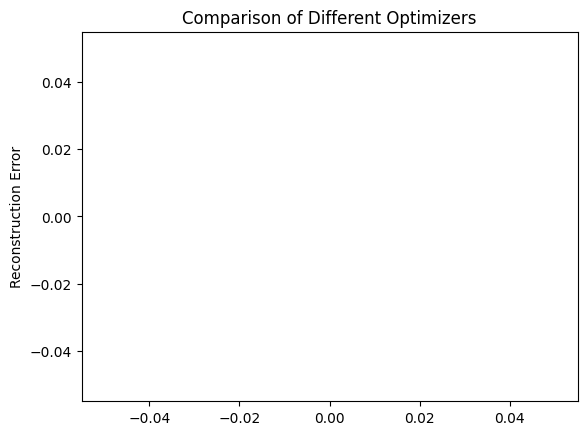

In [4]:
import matplotlib.pyplot as plt

# Note, that the output values may vary due to randomness and library versions used.
print(results) # {'SGD': 1.118100965829119, 'Adam': 0.6905794281260835, 'RMSprop': 0.6879046020328723, 'Adagrad': 1.1260964999387297}

# Plotting the results
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Reconstruction Error')
plt.title('Comparison of Different Optimizers')
plt.show()

Through this plot, we can observe the impact of different optimizers on the Autoencoder's training.

## Lesson Summary and Practice
In sum, we've trained an Autoencoder using different optimizers (Stochastic Gradient Descent, Adam, RMSprop, and Adagrad), assessed their impact on the model, and compared them visually. By the end of the upcoming exercise, you'll have not only a firm understanding of how different optimizers work but also a hands-on understanding of their effects on an Autoencoder's performance. Have fun experimenting!



## Navigating the Cosmos of Optimizers

Are you curious about how different optimizers affect an Autoencoder's mission to reduce data dimensions? The given code enhances an Autoencoder's capabilities by comparing several optimizers and visualizing their performance using a bar plot. Observe how each optimizer contributes to the Autoencoder's capability by clicking Run!

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7507 - val_loss: 0.7494
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7548 - val_loss: 0.7492
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7564 - val_loss: 0.7489
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7489 - val_loss: 0.7487
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7536 - val_loss: 0.7484
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7523 - val_loss: 0.7482
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7519 - val_loss: 0.7479
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7510 - val_loss: 0.7477
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7520 - val_loss: 0.7474
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7553 - val_loss: 0.7472
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7511 - val_loss: 0.7469
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7458 - val_loss: 0.7467
Epoch 13/50


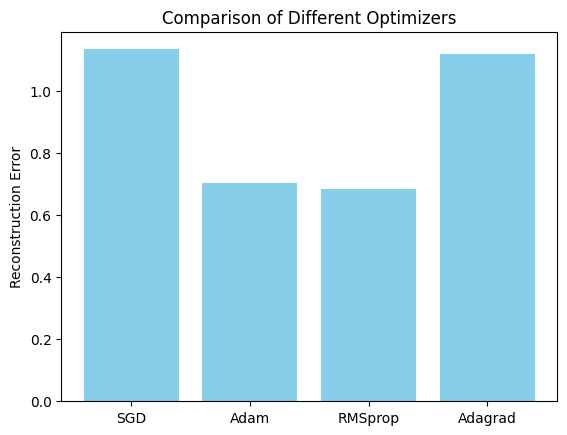

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the dataset
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
x_train, x_test, _, _ = train_test_split(X, digits.target, test_size=0.25, random_state=42)

# Define a simple Autoencoder architecture
def create_autoencoder(input_dim, encoded_dim, optimizer):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(encoded_dim, activation='relu')(input_img)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
    return autoencoder

# Train and evaluate the model
def train_and_evaluate(optimizer, optimizer_name):
    autoencoder = create_autoencoder(64, 32, optimizer)
    autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
    decoded_imgs = autoencoder.predict(x_test)
    reconstruction_error = np.mean((x_test - decoded_imgs) ** 2)
    print(f"Reconstruction error ({optimizer_name}): {reconstruction_error}")
    return reconstruction_error

# Compare different optimizers
optimizers = {
    'SGD': SGD(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.001),
    'RMSprop': RMSprop(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.001)
}

results = {}
for opt_name, opt in optimizers.items():
    results[opt_name] = train_and_evaluate(opt, opt_name)

# Visualize the results in a bar plot
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Reconstruction Error')
plt.title('Comparison of Different Optimizers')
plt.show()

## Setting Up the Autoencoder Optimizer

## Navigating the Cosmos of Optimizers